# Heart Disease Prediction: Data Exploration, Preprocessing, and Model Comparison

In [96]:
#import paskages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier  ,GradientBoostingClassifier

from sklearn.metrics import confusion_matrix , classification_report

## Explore Data

In [69]:
#load datasett
data=pd.read_csv("data/heart (1).csv")

In [70]:
 #head data
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [71]:
#tail data
data.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [72]:
#shape data 
data.shape

(918, 12)

In [73]:
#info data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [74]:
#describe data statistical
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [75]:
#check is null data
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

<Axes: >

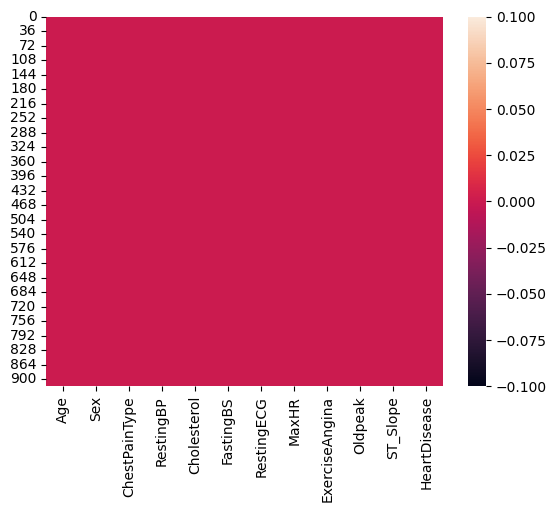

In [76]:
# a heatmap  visually represents  presence of missing values
sns.heatmap(data.isnull())

In [77]:
#check is duplicated data
data.duplicated().sum()

0

### Data analysis

In [78]:
#count of unique values in  'HeartDisease'
data['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

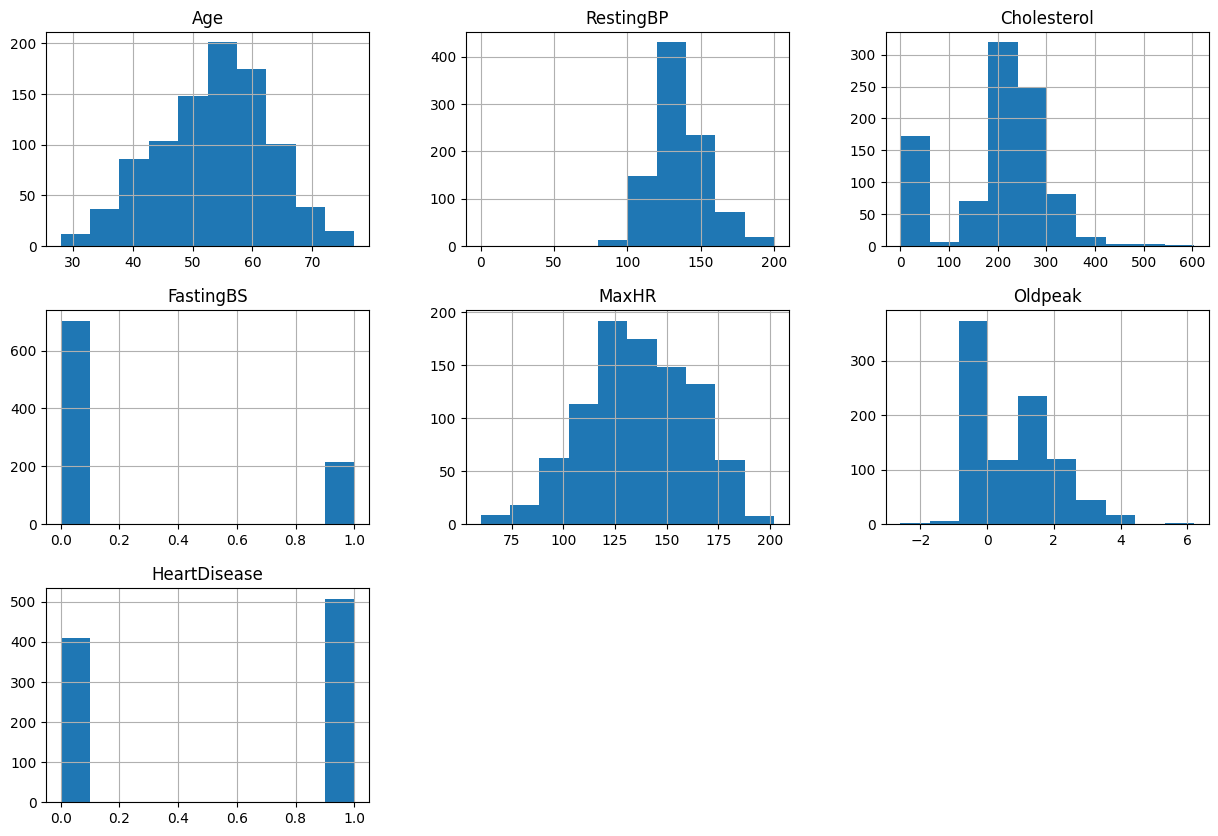

In [79]:
#generates histograms for each numerical column
data.hist(figsize=(15,10))
plt.show()

<Axes: >

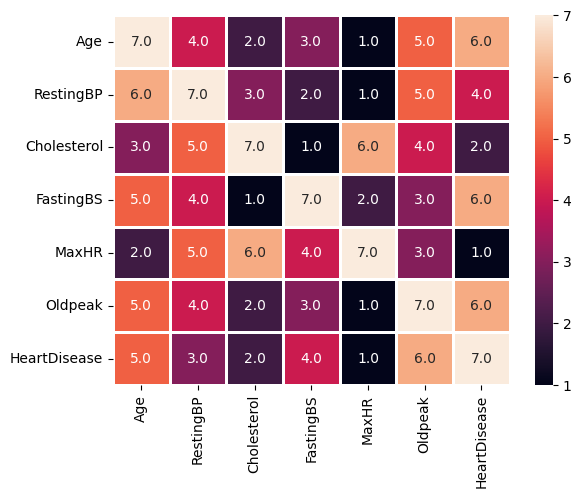

In [80]:
#isualizes  ranked correlation values
cor=data.corr()
sns.heatmap(cor.rank(axis='columns'),annot=True,fmt='.1f',linewidths=2)

### Processing Data

In [81]:
#label encoder
label=LabelEncoder()

In [82]:
# Select columns with categorical data
object_col = data.select_dtypes(include='object')


In [83]:
#show object_col
object_col.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


In [84]:
# Select columns with non-categorical (numeric) data
non_object_col = data.select_dtypes(exclude='object')

In [85]:
#show non_object_col
non_object_col.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0


In [86]:
# Apply LabelEncoder to each column in object_col
for col in object_col.columns:
    object_col[col]=label.fit_transform(object_col[col])

In [88]:
#show object_col after apply label encoder
object_col.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,1,1,1,0,2
1,0,2,1,0,1
2,1,1,2,0,2
3,0,0,1,1,1
4,1,2,1,0,2


In [93]:
#merege non_object_col and object_col with datafrme 
df=pd.concat([object_col,non_object_col],axis=1)

In [94]:
#show 
df.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,1,1,1,0,2,40,140,289,0,172,0.0,0
1,0,2,1,0,1,49,160,180,0,156,1.0,1
2,1,1,2,0,2,37,130,283,0,98,0.0,0
3,0,0,1,1,1,48,138,214,0,108,1.5,1
4,1,2,1,0,2,54,150,195,0,122,0.0,0


In [92]:
df.shape

(1836, 12)

### Modeling ML

In [100]:
# Drop  target column 'HeartDisease' 
x= df.drop(['HeartDisease'],axis=1)

# Assign  target column 'HeartDisease' to 'y'
y=df['HeartDisease']

In [101]:
## Split  data into training and testing sets 

x_train , x_test , y_train , y_test = train_test_split(x,y,train_size=0.8)

In [104]:
def compare_classifiers(x_train, x_test, y_train, y_test):
    # Initialize the classifiers
    classifiers = {
        'K-Nearest Neighbors': KNeighborsClassifier(),
        'Decision Tree': DecisionTreeClassifier(),
        'Support Vector Classifier': SVC(),
        'Random Forest': RandomForestClassifier(),
        'Gradient Boosting': GradientBoostingClassifier()
    }
    
    # Iterate over the classifiers, train, and evaluate them
    for name, clf in classifiers.items():
        print(f'--- {name} ---')
        
        # Train the classifier
        clf.fit(x_train, y_train)
        
        # Make predictions on the test data
        y_pred = clf.predict(x_test)
        
        # Print confusion matrix and classification report
        print('Confusion Matrix:')
        print(confusion_matrix(y_test, y_pred))
        print('\nClassification Report:')
        print(classification_report(y_test, y_pred))
        print('\n' + '-'*40 + '\n')

In [105]:
compare_classifiers_simple(x_train, x_test, y_train, y_test)

Results for KNeighborsClassifier:
[[55 37]
 [11 81]]
              precision    recall  f1-score   support

           0       0.83      0.60      0.70        92
           1       0.69      0.88      0.77        92

    accuracy                           0.74       184
   macro avg       0.76      0.74      0.73       184
weighted avg       0.76      0.74      0.73       184

----------------------------------------
Results for DecisionTreeClassifier:
[[75 17]
 [15 77]]
              precision    recall  f1-score   support

           0       0.83      0.82      0.82        92
           1       0.82      0.84      0.83        92

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.83      0.83      0.83       184

----------------------------------------
Results for SVC:
[[63 29]
 [15 77]]
              precision    recall  f1-score   support

           0       0.81      0.68      0.74        92
           

<hr>

<hr>

Here's a brief summary of the performance for each classifier based on the results you provided:

1. **KNeighborsClassifier**:
   - **Accuracy**: 74%
   - **Precision**: 0.83 for class 0, 0.69 for class 1
   - **Recall**: 0.60 for class 0, 0.88 for class 1
   - **F1-Score**: 0.70 for class 0, 0.77 for class 1

2. **DecisionTreeClassifier**:
   - **Accuracy**: 83%
   - **Precision**: 0.83 for class 0, 0.82 for class 1
   - **Recall**: 0.82 for class 0, 0.84 for class 1
   - **F1-Score**: 0.82 for class 0, 0.83 for class 1

3. **SVC (Support Vector Classifier)**:
   - **Accuracy**: 76%
   - **Precision**: 0.81 for class 0, 0.73 for class 1
   - **Recall**: 0.68 for class 0, 0.84 for class 1
   - **F1-Score**: 0.74 for class 0, 0.78 for class 1

4. **RandomForestClassifier**:
   - **Accuracy**: 86%
   - **Precision**: 0.88 for class 0, 0.85 for class 1
   - **Recall**: 0.85 for class 0, 0.88 for class 1
   - **F1-Score**: 0.86 for class 0, 0.87 for class 1

5. **GradientBoostingClassifier**:
   - **Accuracy**: 87%
   - **Precision**: 0.87 for class 0, 0.87 for class 1
   - **Recall**: 0.87 for class 0, 0.87 for class 1
   - **F1-Score**: 0.87 for class 0, 0.87 for class 1

### Summary:
- **Best Accuracy**: GradientBoostingClassifier (87%)
- **Best Precision**: GradientBoostingClassifier (0.87 for both classes)
- **Best Recall**: GradientBoostingClassifier (0.87 for both classes)
- **Best F1-Score**: GradientBoostingClassifier (0.87 for both classes)

The GradientBoostingClassifier performs the best across all metrics in this comparison, making it the most effective model for this dataset based on the provided results.